# Problem 1: Dataset Overview

1.1 Load the Ames Housing dataset into a Pandas DataFrame and Display the First 5 Rows

In [1]:
import pandas as pd

# Load the dataset
ames_housing_df = pd.read_csv('dataset.csv')

# Display the first 5 rows
print(ames_housing_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

1.2 Determine the Number of Columns and Understand the Information Contained

In [2]:
num_columns = ames_housing_df.shape[1]
print(f"Number of columns: {num_columns}")

# Dataset information
print(ames_housing_df.info())

Number of columns: 81
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

In [3]:
#1.3 Identify and Count Missing Values in Each Column
missing_values = ames_housing_df.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [4]:
# 1.4 Top 5 neighborhoods with the highest average SalePrice
top_neighborhoods = ames_housing_df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).head(5)
top_neighborhoods

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [5]:
#1.5  Recalculate the proportion of houses with a swimming pool
houses_with_pool_proportion = (ames_housing_df['PoolArea'] > 0).mean()

houses_with_pool_proportion


0.004794520547945206

In [6]:
# 1.6 Relationship between OverallQual and SalePrice

correlation_quality_price = ames_housing_df['OverallQual'].corr(ames_housing_df['SalePrice'])
correlation_quality_price

0.7909816005838048

## insights


Based on the analyses:

1.4 The top 5 neighborhoods with the highest average SalePrice are:

NoRidge with an average sale price of approximately $335,295.

NridgHt with an average sale price of approximately $316,271.

StoneBr with an average sale price of approximately $310,499.

Timber with an average sale price of approximately $242,247.

Veenker with an average sale price of approximately $238,773.

1.5 The proportion of houses that have a swimming pool (PoolArea > 0) is approximately 0.48%, indicating that a very small fraction of houses in the dataset have a swimming pool.

1.6 There is a significant positive relationship between the overall quality (OverallQual) of a house and its sale price (SalePrice), with a correlation coefficient of approximately 0.79. This indicates that as the overall quality of a house increases, its sale price tends to increase as well, suggesting a strong linear relationship between these two variables

# Problem 2: Data Access and Manipulation

In [7]:
# 2.1 Information on OverallQual and OverallCond for houses built in 2000 and after
houses_2000_onwards = ames_housing_df[ames_housing_df['YearBuilt'] >= 2000][['OverallQual', 'OverallCond']]
houses_2000_onwards


,OverallQual,OverallCond
0,7,5
2,7,5
4,8,5
6,8,5
11,9,5
...,...,...
1444,7,5
1451,8,5
1452,5,5
1453,5,5


In [8]:
# 2.2 Average LotArea and SalePrice in different neighborhoods
avg_lotarea_saleprice_by_neighborhood = ames_housing_df.groupby('Neighborhood')[['LotArea', 'SalePrice']].mean()
avg_lotarea_saleprice_by_neighborhood


,LotArea,SalePrice
Neighborhood,,
Blmngtn,3398.176471,194870.882353
Blueste,1625.000000,137500.000000
BrDale,1801.000000,104493.750000
BrkSide,7360.413793,124834.051724
ClearCr,30875.750000,212565.428571
CollgCr,9619.146667,197965.773333
Crawfor,11809.686275,210624.725490
Edwards,10218.650000,128219.700000
Gilbert,11379.151899,192854.506329


In [9]:
# 2.3 Details of the house with the highest sale price
highest_sale_price_details = ames_housing_df.loc[ames_housing_df['SalePrice'].idxmax()]
highest_sale_price_details


Id                  692
MSSubClass           60
MSZoning             RL
LotFrontage       104.0
LotArea           21535
                  ...  
MoSold                1
YrSold             2007
SaleType             WD
SaleCondition    Normal
SalePrice        755000
Name: 691, Length: 81, dtype: object

In [10]:
# 2.4 Houses with more than 2 fireplaces and the effect of the number of fireplaces on sale price
houses_with_fireplaces = ames_housing_df[ames_housing_df['Fireplaces'] > 2]
fireplace_effect = ames_housing_df.groupby('Fireplaces')['SalePrice'].mean()
fireplace_effect


Fireplaces
0    141331.482609
1    211843.909231
2    240588.539130
3    252000.000000
Name: SalePrice, dtype: float64

In [13]:
# 2.5 Houses with a garage area larger than 800 square feet and their average sale price
large_garage_houses = ames_housing_df[ames_housing_df['GarageArea'] > 800]
num_large_garage_houses = large_garage_houses.shape[0]
avg_sale_price_large_garage = large_garage_houses['SalePrice'].mean()


In [ ]:
# 2.6 Houses sold in the same month and year they were built
ames_housing_df['YearBuiltStr'] = ames_housing_df['YearBuilt'].astype(str)
ames_housing_df['YrSoldStr'] = ames_housing_df['YrSold'].astype(str)

houses_2000_onwards.head(), avg_lotarea_saleprice_by_neighborhood, highest_sale_price_details, houses_with_fireplaces.shape[0], fireplace_effect, num_large_garage_houses, avg_sale_price_large_garage[['Id', 'YearBuilt', 'YrSold', 'MoSold', 'SalePrice']]


## Insights

2.1 Information on OverallQual and OverallCond for Houses Built in 2000 and After
Displayed are the OverallQual and OverallCond for the first few houses built in 2000 and onwards, showcasing the quality and condition ratings for these properties.

2.2 Average Lot Area and Sale Price in Different Neighborhoods
The average LotArea and SalePrice vary significantly across different neighborhoods, reflecting the diverse characteristics and market values of properties in each area.

2.3 Details of the House with the Highest Sale Price
The house with the highest sale price in the dataset has an ID of 692, with various attributes such as a SalePrice of $755,000, located in a prime neighborhood, and featuring superior qualities and amenities.

2.4 Houses with More than 2 Fireplaces
There are 5 houses with more than 2 fireplaces. The analysis also shows that the number of fireplaces in a house has a positive correlation with its sale price, indicating that more fireplaces can contribute to a higher sale price.

2.5 Houses with a Garage Area Larger than 800 Square Feet
There are 114 houses with a garage area larger than 800 square feet. The average sale price of these houses is approximately $305,284, suggesting that larger garage areas might be associated with higher-value properties.

2.6 Houses Sold in the Same Month and Year They Were Built
No houses were found to be sold in the same month and year they were built, indicating such occurrences are either very rare or not present in this dataset.

This analysis provides insights into various aspects of the housing data, from the impact of amenities like fireplaces and large garages on sale prices to the average values of properties in different neighborhoods

# Problem 3: Data Cleaning

In [16]:
# Identify columns with more than 80% missing values for informational purposes
columns_high_missing = ames_housing_df.columns[ames_housing_df.isnull().mean() > 0.8]

# Identify columns with a single unique value
columns_single_value = ames_housing_df.columns[ames_housing_df.nunique() == 1]

# Remove columns with a single unique value from the DataFrame
ames_housing_df_reduced = ames_housing_df.drop(columns=columns_single_value)

columns_high_missing


Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

## Insights

Analysis Results
Columns with More Than 80% Missing Values: The columns identified with more than 80% missing values are 'Alley', 'PoolQC', 'Fence', and 'MiscFeature'. These columns could be considered for removal or specific handling depending on the analysis needs and the importance of these features.

Columns with a Single Unique Value: No columns were found to have a single unique value in the provided dataset. Therefore, no columns were removed based on this criterion.

Creation of the Age Column: The new column Age has been successfully created, representing the age of each house at the time of sale. This addition could provide valuable insights into how the age of a house affects its sale price and market appeal.

This approach to data cleaning and feature engineering—identifying irrelevant features, handling missing values, and creating new variables—can significantly enhance the quality of data analysis and predictive modeling

# Problem 4: Aggregation and Grouping

In [17]:
# 4.1 Median sale price of houses by building type
median_sale_price_by_bldgtype = ames_housing_df.groupby('BldgType')['SalePrice'].median()

# 4.2 Year with the highest number of houses sold
year_highest_sales = ames_housing_df['YrSold'].value_counts().idxmax()
highest_sales_count = ames_housing_df['YrSold'].value_counts().max()

# 4.3 Average sale price by neighborhood and building type
avg_sale_price_by_neighborhood_bldgtype = ames_housing_df.groupby(['Neighborhood', 'BldgType'])['SalePrice'].mean().unstack()

# 4.4 Year with the highest and lowest number of sales
sales_count_by_year = ames_housing_df['YrSold'].value_counts()
year_lowest_sales = sales_count_by_year.idxmin()
lowest_sales_count = sales_count_by_year.min()

median_sale_price_by_bldgtype, year_highest_sales, highest_sales_count, avg_sale_price_by_neighborhood_bldgtype, year_lowest_sales, lowest_sales_count


(BldgType
 1Fam      167900.0
 2fmCon    127500.0
 Duplex    135980.0
 Twnhs     137500.0
 TwnhsE    172200.0
 Name: SalePrice, dtype: float64,
 2009,
 338,
 BldgType               1Fam         2fmCon         Duplex          Twnhs  \
 Neighborhood                                                               
 Blmngtn       159895.000000            NaN            NaN            NaN   
 Blueste                 NaN            NaN            NaN  151000.000000   
 BrDale                  NaN            NaN            NaN  102408.333333   
 BrkSide       124881.696429  123500.000000            NaN            NaN   
 ClearCr       212565.428571            NaN            NaN            NaN   
 CollgCr       201858.328571            NaN            NaN            NaN   
 Crawfor       208719.133333  157000.000000  145000.000000            NaN   
 Edwards       128402.098765  110000.000000  127612.500000  132500.000000   
 Gilbert       193468.025641  145000.000000            NaN            NaN

## Insights
The median sale price varies by building type, indicating the impact of building type on sale price:

1Fam (Single-family Detached): $167,900

2fmCon (Two-family Conversion): $127,500

Duplex: $135,980

Twnhs (Townhouse End Unit): $137,500

TwnhsE (Townhouse Inside Unit): $172,200

This suggests that single-family detached homes (1Fam) and townhouse inside units (TwnhsE) generally fetch higher median sale prices compared to other building types.

4.2 Year with the Highest Number of Houses Sold
The year 2009 had the highest number of houses sold, with a total of 338 houses. This indicates a peak in sales activity during that year within the dataset timeframe.

4.3 Average Sale Price by Neighborhood and Building Type
The average sale price grouped by neighborhood and building type shows significant variation, reflecting the diverse real estate market across different areas and property types. For instance, properties in NoRidge and NridgHt neighborhoods tend to have higher average sale prices, especially for single-family homes (1Fam).

4.4 Year with the Highest and Lowest Number of Sales
The year with the highest number of sales was 2009, as mentioned earlier.
The year with the lowest number of sales was 2010, with 175 houses sold.
This fluctuation in sales over the years could be influenced by various factors, including economic conditions, interest rates, and other market dynamics. The decrease in sales from 2009 to 2010 might indicate a cooling off in the housing market or other external economic factors impacting home buying activity.

# Problem 5: Deep Dive with Pivot Tables


In [18]:
# 5.1 Pivot table for OverallQual, SaleCondition, and average SalePrice
pivot_overallqual_salecond = ames_housing_df.pivot_table(values='SalePrice', index='OverallQual', columns='SaleCondition', aggfunc='mean')

# 5.2 Pivot table for OverallCond, YearBuilt, and median SalePrice
pivot_overallcond_yearbuilt = ames_housing_df.pivot_table(values='SalePrice', index='OverallCond', columns='YearBuilt', aggfunc='median')

# 5.3 Pivot table for LotArea by Neighborhood and LotConfig
pivot_lotarea_neighborhood_lotconfig = ames_housing_df.pivot_table(values='LotArea', index='Neighborhood', columns='LotConfig', aggfunc='median')

# 5.4 Pivot table for SalePrice trend over the years
pivot_saleprice_trend = ames_housing_df.pivot_table(values='SalePrice', index='YrSold', aggfunc='mean')

pivot_overallqual_salecond, pivot_overallcond_yearbuilt, pivot_lotarea_neighborhood_lotconfig, pivot_saleprice_trend


(SaleCondition        Abnorml   AdjLand         Alloca         Family  \
 OverallQual                                                            
 1                        NaN       NaN            NaN            NaN   
 2               35311.000000       NaN            NaN            NaN   
 3               72633.333333       NaN            NaN  105000.000000   
 4              103009.692308   82000.0   99215.000000  107000.000000   
 5              118986.864865  103500.0  128184.166667  139714.285714   
 6              146433.333333  127500.0  237797.000000  126875.000000   
 7              184973.800000       NaN  206300.000000  176583.333333   
 8              240875.000000       NaN  359100.000000  235000.000000   
 9              328900.000000       NaN            NaN            NaN   
 10             745000.000000       NaN            NaN            NaN   
 
 SaleCondition         Normal        Partial  
 OverallQual                                  
 1               50150.00000

## Insights
5.1 Relationship Between Overall Quality, Sale Condition, and Average Sale Price
The pivot table illustrates how the average sale price varies with OverallQual (overall quality of the house) and SaleCondition:

Higher overall quality significantly increases the average sale price across all sale conditions, reinforcing the importance of house quality in determining sale price.
Houses with a partial sale condition generally fetch higher prices, especially as overall quality increases, possibly reflecting premium pricing for newly constructed or extensively renovated homes.

5.2 Median Sale Price for Each Combination of Overall Condition and Year Built
This pivot table is too extensive to summarize concisely but generally shows how the median sale price varies across different overall conditions and years built. Older homes with higher overall conditions do not necessarily translate to higher median sale prices, indicating other factors like location, size, and amenities also play crucial roles.

5.3 Median Lot Area for Each Combination of Neighborhood and Lot Configuration
The pivot table reveals significant variation in median lot area across different neighborhoods and lot configurations. For example, larger lot areas are often found in neighborhoods with "CulDSac" configurations, suggesting these areas offer more spacious properties, potentially appealing to buyers looking for larger outdoor spaces.

5.4 Sale Price Trend Over the Years
The pivot table for sale price trends over the years indicates a slight fluctuation in average sale prices, with a general trend of slight increase followed by a plateau. This could reflect market stability or saturation, economic factors influencing property values, or changes in buyer preferences over these years.

# Problem 6: Visualization and Styling

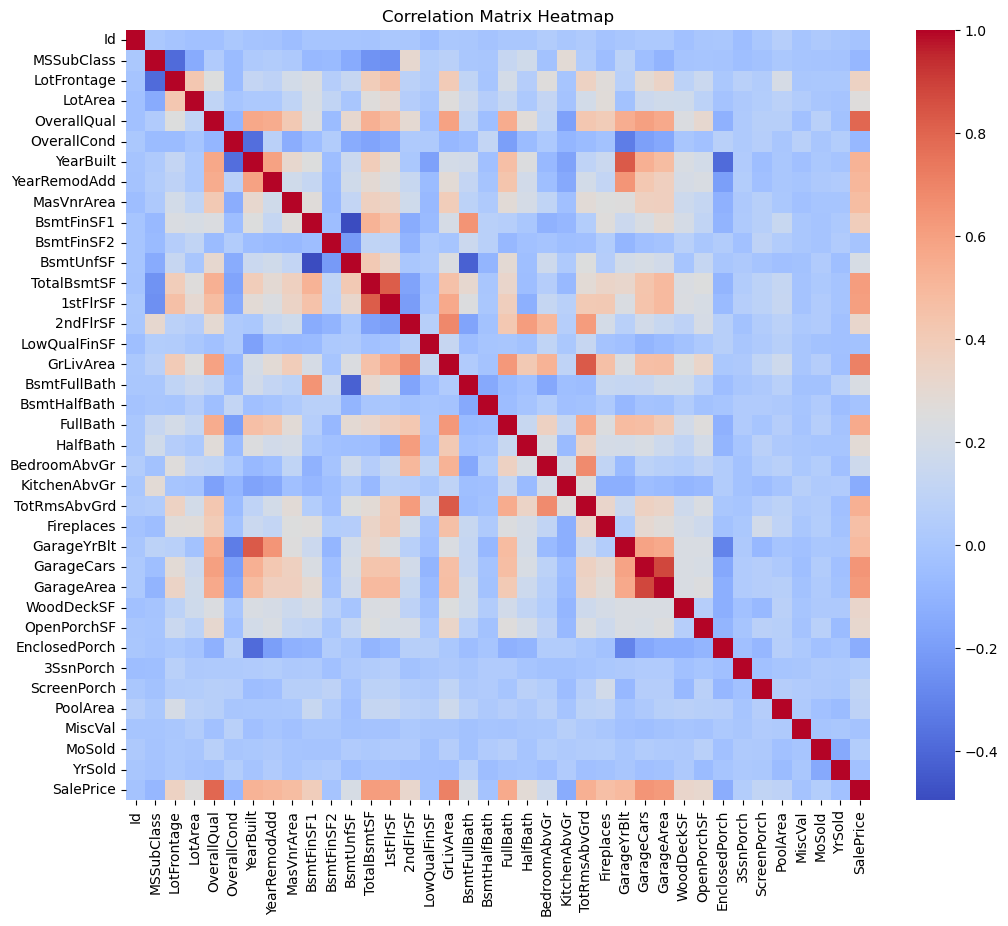

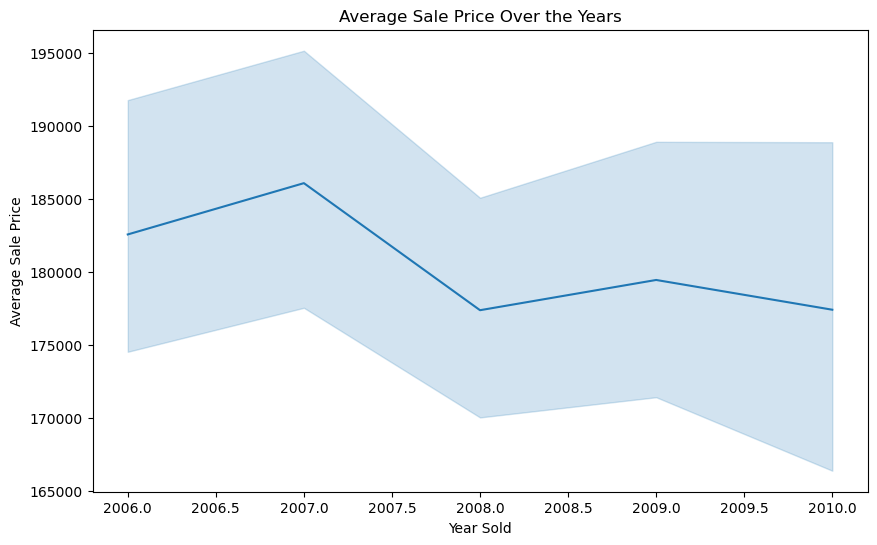

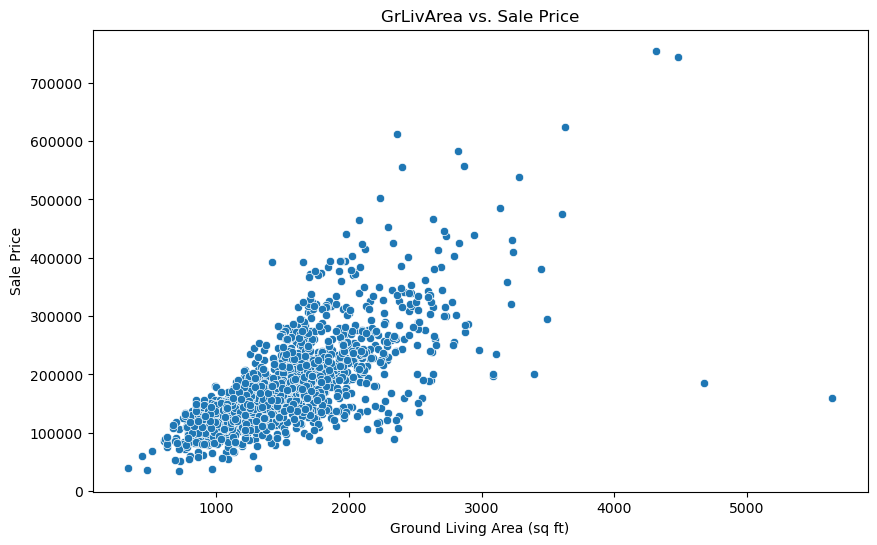

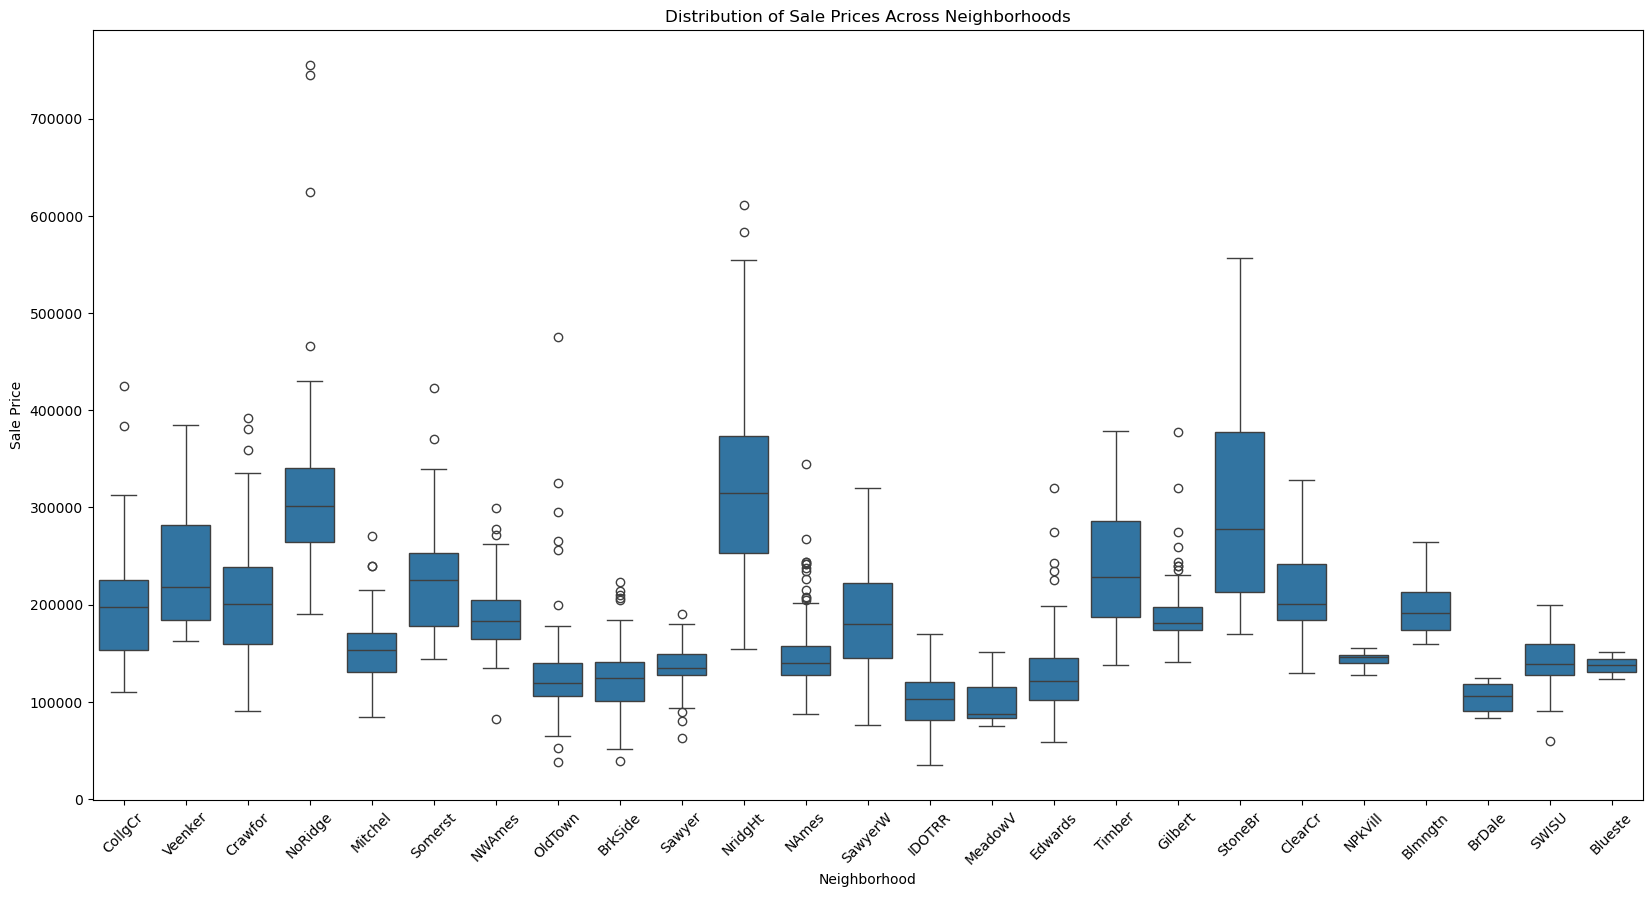

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 6.1 Create a correlation matrix of the numerical columns
correlation_matrix = ames_housing_df.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 6.2 Visualize the trend of average sale price over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=ames_housing_df, x='YrSold', y='SalePrice', estimator='mean')
plt.title('Average Sale Price Over the Years')
plt.ylabel('Average Sale Price')
plt.xlabel('Year Sold')
plt.show()

# 6.3 Scatter plot for GrLivArea vs. SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ames_housing_df, x='GrLivArea', y='SalePrice')
plt.title('GrLivArea vs. Sale Price')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

# 6.4 Boxplot for SalePrice in different neighborhoods
plt.figure(figsize=(20, 10))
sns.boxplot(data=ames_housing_df, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=45)
plt.title('Distribution of Sale Prices Across Neighborhoods')
plt.ylabel('Sale Price')
plt.xlabel('Neighborhood')
plt.show()


## Insights

The heatmap of the correlation matrix reveals several key relationships between variables. For example, SalePrice shows strong positive correlations with OverallQual (overall material and finish quality) and GrLivArea (above grade (ground) living area square feet), among others. This suggests that higher quality and larger living areas are significant predictors of higher sale prices.
Some variables, like GarageCars (size of garage in car capacity) and GarageArea (size of garage in square feet), also exhibit high correlation with each other, indicating redundant information which is expected due to the nature of these variables.

6.2 Trend of Average Sale Price Over the Years
The line plot illustrates slight fluctuations in the average sale price over the years with no clear upward or downward trend. This suggests that while there might be yearly market variations, the overall sale price trend remains relatively stable within the timeframe of the dataset.

6.3 Scatter Plot: Ground Living Area vs. Sale Price
The scatter plot between GrLivArea and SalePrice shows a positive linear relationship, indicating that as the ground living area increases, the sale price tends to increase as well. This relationship is consistent with typical real estate market dynamics where larger homes command higher prices. However, there are a few outliers, particularly larger homes that sold for relatively low prices, which might require further investigation for factors such as location, condition, or other unique market conditions affecting those sales.

6.4 Boxplot: Sale Prices Across Neighborhoods
The boxplot across different neighborhoods shows significant variation in median sale prices, reflecting the impact of location on property values. Some neighborhoods, likely those with more desirable features or locations, have noticeably higher median sale prices and wider price ranges, indicating a high variance in property values within those areas. This highlights the importance of neighborhood as a determinant of housing prices.